In [248]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [158]:
###Different source references
url_topscorers = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/topscorers"
url_leagues = "https://elenasport-io1.p.rapidapi.com/v2/leagues"
url_league_id = "https://elenasport-io1.p.rapidapi.com/v2/leagues/263"
url_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons"
url_players = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/players"
url_teams = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/teams"
url_fixtures_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/fixtures"
url_upcoming_fixtures = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/upcoming"

In [160]:
def collect_data(url):
    """
    function to collect all the produced from that API
    input: url (The reference to the desired data to be collected)
    output: data table of collected sets of data.
    """
    querystring = {"page":"1"}
    headers = {
    'x-rapidapi-host': "elenasport-io1.p.rapidapi.com",
    'x-rapidapi-key': "c1858f9ca6mshb6842cc846ee798p1f633cjsnb369850f3cb9"
    }
    i = 2
    response = requests.request("GET", url, headers=headers, params=querystring)
    response_list = response.json()["data"]
    response_df = pd.DataFrame(response_list)
    while response.status_code == 200 and response.json()["pagination"]["hasNextPage"] == True:
        querystring = {"page":str(i)}
        response = requests.request("GET", url, headers=headers, params=querystring)
        try:
            response_df = response_df.append(pd.DataFrame(response.json()["data"]), ignore_index=True)
            #print(response.json()["data"])
            print("page:", i)
            i += 1
        except:
            continue
    return response_df

In [208]:
##Collect data from sources
data_topscorers = collect_data(url_topscorers)
#data_leagues = collect_data(url_leagues)
#data_season = collect_data(url_season)
#data_players = collect_data(url_players)
#data_teams = collect_data(url_teams)
#data_fixtures_season = collect_data(url_fixtures_season)
#data_upcoming_fixtures = collect_data(url_upcoming_fixtures)

page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10


##LIST OF COMMANDS
This represents the list of the diffenet commands to be applied by the robot on discord


1. Top 10 scorers of a {particular league} in a {particular season} (KPI: Total goals - PlayerName) 
    Data used: Topscorers data
    - (Les 10 premier)
    1.a) Visualization: Histogram Chart
          * y = Total Goals
          * x = Player Name

2. % of vicotry, defeat and draw for the 10 latest games.
    Data used:
    -(The 5-10 latest results)
    2.a) visualization: Pie Chart
      
3. Average number of goals for each team
   - Data used: from seasons to fixture
   - keys in fixtures we need: "team_home_90min_goals" & "team_away_90min_goals"
    3.a) visualization: ???????

4. Focus on 1 fixture (=game) and present an overview of the datas related to this game
   - Data used: 

In [60]:
data_leagues

,id,idCountry,countryName,name,nationalLeague,clubsLeague
0,116,9.0,Belarus,1. Division,True,True
1,215,21.0,Cyprus,1. Division,True,True
2,381,62.0,Norway,1. Division,True,True
3,224,23.0,Denmark,1st Division,True,True
4,273,32.0,Germany,2. Bundesliga,True,True
...,...,...,...,...,...,...
195,300,39.0,Iceland,Úrvalsdeild,True,True
196,256,30.0,Finland,Veikkausliiga,True,True
197,340,50.0,Latvia,Virsliga,True,True
198,517,91.0,Vietnam,V.League 1,True,True


In [61]:
data_leagues.loc[data_leagues['countryName'] == 'France']

,id,idCountry,countryName,name,nationalLeague,clubsLeague
48,268,31.0,France,Coupe de France,True,True
100,263,31.0,France,Ligue 1,True,True
101,264,31.0,France,Ligue 2,True,True


In [85]:
data_teams

,id,name,fullName,country,founded,officialPage,phone,email,address,badgeURL
0,942,Angers,Angers SCO,France,1919,http://www.angers-sco.fr,+33 (892) 390 820,angers-sco@wanadoo.fr,"73, boulevard Jacques PortetAngers",https://cdn.elenasport.io/badges/150x150/942
1,937,Bordeaux,FC Girondins de Bordeaux,France,1881,http://www.girondins.com,+33 (89) 268 3433,contact@girondins.com,Rue Joliot Curie 33187Le Haillan,https://cdn.elenasport.io/badges/150x150/937
2,958,Brest,Stade Brestois 29,France,1950,http://www.sb29.com,+33 (29) 802 2030,info@stade-brestois.com,Rue du Bot42005Brest,https://cdn.elenasport.io/badges/150x150/958
3,959,Clermont,Clermont Foot 63,France,1990,http://www.clermontfoot.com,+33 (47) 325 7902,clermont-foot@caramail.com,"4, rue Adrien MabrutClermont-Ferrand",https://cdn.elenasport.io/badges/150x150/959
4,999,Lens,Racing Club de Lens,France,1906,http://www.rclens.fr,+33 (32) 113 2132,contact@rclens.fr,"33, rue Arthur Lamendin62210Avion",https://cdn.elenasport.io/badges/150x150/999
5,930,Lille,Lille OSC Métropole,France,1944,http://www.losc.fr,+33 (32) 017 7177,contact@losc.fr,"261, boulevard de Tournai59044Villeneuve-d'Ascq",https://cdn.elenasport.io/badges/150x150/930
6,947,Lorient,FC Lorient,France,1926,http://www.fclweb.fr,+33 (29) 735 1500,webmaster@fclweb.fr,Espace FCL - Kerlir - CS 3013156104Ploemeur,https://cdn.elenasport.io/badges/150x150/947
7,1036,Metz,FC Metz,France,1932,http://www.fcmetz.com,+33 (38) 766 7215,fcmetz@fcmetz.com,"3, allée Saint-Symphorien57000Metz",https://cdn.elenasport.io/badges/150x150/1036
8,940,Monaco,AS Monaco FC,Monaco,1919,http://www.asm-fc.com,+377 9205 7473,info@asm-fc.com,"7, avenue des Castelans98014Monaco",https://cdn.elenasport.io/badges/150x150/940
9,932,Montpellier,Montpellier HSC,France,1974,http://www.mhscfoot.com,+33 (46) 715 4600,mhsc@mhscfoot.com,Domaine de Grammont34070Montpellier,https://cdn.elenasport.io/badges/150x150/932


In [86]:
data_players

,id,name,nationalities,fullName,pob,dob,height,weight,foot,photoURL
0,57,A. Limbombe,[Belgium],Anthony Limbombe Ekango,Mechelen,1994-07-15,177.0,72.0,right,https://cdn.elenasport.io/players/150x150/57
1,77,J. Uronen,[Finland],Jere Uronen,Turku,1994-07-13,177.0,75.0,left,https://cdn.elenasport.io/players/150x150/77
2,91,W. Faes,[Belgium],Wout Faes,None,1998-04-03,187.0,84.0,right,https://cdn.elenasport.io/players/150x150/91
3,99,G. Biancone,[France],Giulian Biancone,None,2000-03-31,187.0,NaN,right,None
4,100,K. Dabila,[Côte d'Ivoire],Kouadio Yves Dabila,None,1997-01-01,183.0,NaN,None,https://cdn.elenasport.io/players/150x150/100
...,...,...,...,...,...,...,...,...,...,...
195,16001,Lucas Paquetá,[Brazil],Lucas Tolentino Coelho de Lima,Rio de Janeiro,1997-08-27,180.0,72.0,left,https://cdn.elenasport.io/players/150x150/16001
196,16003,Pau López,[Spain],Pau López Sabata,Girona,1994-12-13,189.0,77.0,left,https://cdn.elenasport.io/players/150x150/16003
197,16006,J. Kluivert,[Netherlands],Justin Kluivert,Amsterdam,1999-05-05,171.0,66.0,right,https://cdn.elenasport.io/players/150x150/16006
198,16073,A. Milik,[Poland],Arkadiusz Milik,Tychy,1994-02-28,186.0,80.0,left,https://cdn.elenasport.io/players/150x150/16073


In [121]:
data_fixtures_season

,id,idCountry,countryName,idLeague,leagueName,idSeason,seasonName,idHome,homeName,idAway,...,team_home_1stHalf_goals,team_away_1stHalf_goals,team_home_2ndHalf_goals,team_away_2ndHalf_goals,elapsed,elapsedPlus,eventsHash,lineupsHash,statsHash,referees
0,228030,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,940,Monaco,931,...,1,1,0,0,0,0,28f4c7904a8c3e71b95eb717ccab74107fd75998,2403e90349389dced826ec38a56188b20e2488f1,2db7e9b27969738d4889dd9adce648f450d81a05,"[{'type': 'referee', 'idReferee': 14925, 'refe..."
1,228031,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,939,Olympique Lyonnais,958,...,0,1,1,0,0,0,7446e0e8317c82fbb7f95b26cd58dd49ee912621,27ef34f0eaeca8a738c32feb45b5e5b7de8fdd45,bb213bb5710d1574a2a5bafe6f1378e2ea387fed,"[{'type': 'referee', 'idReferee': 15076, 'refe..."
2,228032,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,936,Troyes,948,...,1,2,0,0,0,0,62ac9f95916fcf12bb264cce27a3f8a2736c93e2,2b8927805ac648da4984adaff12455fd1b12ea75,dd41a65aac598c3175d452325d78969f1c9917f1,"[{'type': 'referee', 'idReferee': 15245, 'refe..."
3,228033,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,945,Rennes,999,...,1,1,0,0,0,0,c9213107f0e00a2c5f3aa72facb56348a2d73d5b,3f43720146464a06007e68d572824e7a1a9ffea9,491742d241f39f993b62e05dfd78cd580298d51f,"[{'type': 'referee', 'idReferee': 14521, 'refe..."
4,228035,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,941,Saint-Étienne,947,...,0,0,1,1,0,0,7c811821b9c2990438c52b3d967b19d29f54b4d0,99cb1df32db5af60497b8226f9699f0d33f76cf6,c2bddad3613a2cf8739faa348a04b21b2cc74998,"[{'type': 'referee', 'idReferee': 14731, 'refe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,228275,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,946,Reims,958,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
246,228276,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,945,Rennes,936,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
247,228277,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,933,Nice,942,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
248,228278,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,947,Lorient,932,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None


In [201]:
data_fixtures_season[['id', 'seasonName','homeName', 'awayName','team_home_90min_goals', 'team_away_90min_goals', 'date']]

,id,seasonName,homeName,awayName,team_home_90min_goals,team_away_90min_goals,date
0,228030,Ligue 1 - 2021/2022,Monaco,Nantes,1,1,2021-08-06 19:00:00
1,228031,Ligue 1 - 2021/2022,Olympique Lyonnais,Brest,1,1,2021-08-07 15:00:00
2,228032,Ligue 1 - 2021/2022,Troyes,PSG,1,2,2021-08-07 19:00:00
3,228033,Ligue 1 - 2021/2022,Rennes,Lens,1,1,2021-08-08 11:00:00
4,228035,Ligue 1 - 2021/2022,Saint-Étienne,Lorient,1,1,2021-08-08 13:00:00
...,...,...,...,...,...,...,...
120,228150,Ligue 1 - 2021/2022,Lens,Troyes,4,0,2021-11-05 20:00:00
121,228153,Ligue 1 - 2021/2022,Lille,Angers,1,1,2021-11-06 16:00:00
122,228156,Ligue 1 - 2021/2022,Bordeaux,PSG,2,3,2021-11-06 20:00:00
123,228157,Ligue 1 - 2021/2022,Olympique Marseille,Metz,0,0,2021-11-07 12:00:00


In [ ]:
data_fixtures_season['winner'] = data_fixtures_season['team_home_90min_goals']

In [214]:
data_10_topscorers = data_topscorers.sort_values(by=['totalGoals'], ascending = False)[1:11]
data_10_topscorers

,idPlayer,playerName,totalGoals,penaltiesScored,penaltiesMissed,rank
1,15321,K. Mbappé,11,2,0,2
2,202,J. David,10,2,0,3
3,14533,G. Laborde,9,0,0,4
4,14938,W. Ben Yedder,9,5,0,4
5,19213,M. Terrier,9,0,0,4
6,19319,L. Ajorque,9,2,0,4
7,15313,L. Blas,8,2,0,8
8,26502,M. Bayo,8,1,0,8
12,23741,R. Faivre,7,5,0,10
14,112048,H. Ekitike,7,1,0,10


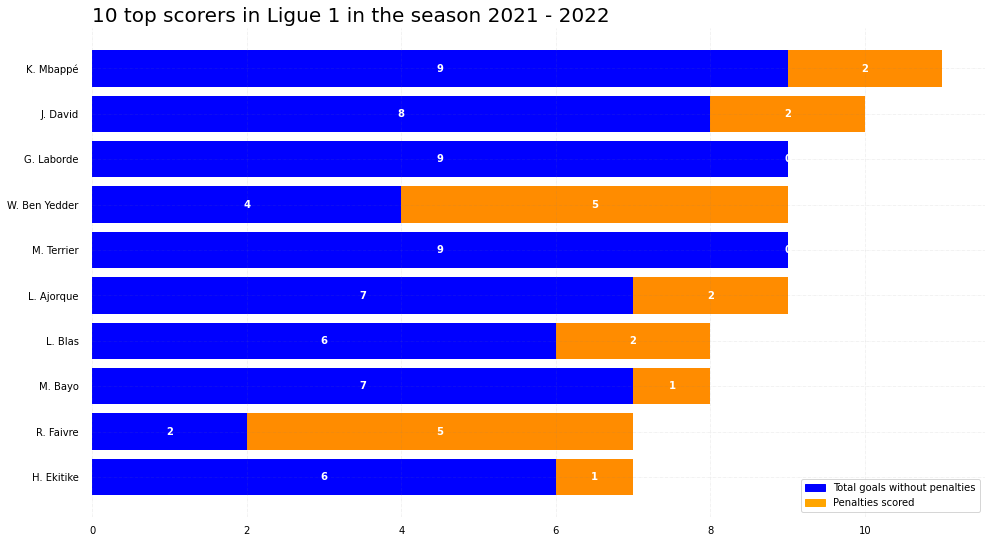

In [257]:
players = data_10_topscorers['playerName']
total_goals_without_penalties = data_10_topscorers['totalGoals'] - data_10_topscorers['penaltiesScored']
penalties_scored = data_10_topscorers['penaltiesScored']
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
b1 = ax.barh(players, total_goals_without_penalties, color = 'blue')
b2 = ax.barh(players, penalties_scored, left = total_goals_without_penalties, color = 'darkorange')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white', fontweight ='bold')
# Add Plot Title
ax.set_title('10 top scorers in Ligue 1 in the season 2021 - 2022', loc ='left', fontsize=20)

blue_patch = mpatches.Patch(color='blue', label='Total goals without penalties')
orange_patch = mpatches.Patch(color='orange', label='Penalties scored')
ax.legend(handles=[blue_patch, orange_patch])

plt.show()

In [57]:
data_topscores['totalGoals'].unique()

array([26, 23, 21, 19, 18, 17, 15, 14, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2])

In [77]:
data_season[data_season['idLeague']==263]

,id,idLeague,leagueName,start,end
60,4242,263,Ligue 1 - 2021/2022,2021,2022


In [ ]:
data_season.columns

Index(['id', 'idLeague', 'leagueName', 'start', 'end'], dtype='object')

In [67]:
data_season[['idLeague','leagueName']]

,idLeague,leagueName
0,177,Copa do Nordeste - 2022
1,71,World Cup - 2022 Qatar
2,314,State Cup - 2021/2022
3,104,Armenian Cup - 2021/2022
4,493,Turkish Cup - 2021/2022
...,...,...
195,426,Super Cup - 2020/2021
196,425,Cup - 2020/2021
197,423,FNL - 2020/2021
198,338,FA Cup - 2020


In [ ]:
data_season['leagueName'].unique()

array(['Copa do Nordeste - 2022', 'World Cup - 2022 Qatar',
       'State Cup - 2021/2022', 'Armenian Cup - 2021/2022',
       'Turkish Cup - 2021/2022', 'Serie C - 2021/2022',
       'Copa Gaúcha - 2021', 'Super Cup - 2021/2022', 'Cupa - 2021/2022',
       'Kategoria e Parë - 2021/2022', 'UEFA Super Cup - 2021/2022',
       'Thai League 1 - 2021/2022', 'Copa Rio - 2021',
       'Kategoria Superiore - 2021/2022', 'Premyer Liqa - 2021/2022',
       'UEFA Europa League - 2021/2022', 'Copa Paulista - 2021',
       'Ukrainian Cup - 2021/2022', 'Super League - 2021/2022',
       'Serie B - 2021/2022',
       'South African Premier Division - 2021/2022',
       'Cupa României - 2021/2022', 'Cup - 2021/2022',
       'Liga Nacional - 2021/2022', 'Canadian Championship - 2021',
       'Premier League - 2021/2022', 'Pro League - 2021/2022',
       'Coppa Italia - 2021/2022', 'KNVB Beker - 2021/2022',
       '1. Division - 2021/2022', 'Serie A - 2021/2022',
       'TFF 1. Lig - 2021/2022', 'FA Cu